In [107]:
import pandas as pd
import numpy as np
import collections
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing necessary libraries for NLP

import spacy
from nltk.tokenize.toktok import ToktokTokenizer
import re, string, unicodedata, pprint
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import contractions
import unicodedata
from contractions import CONTRACTION_MAP
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk import word_tokenize, pos_tag, ne_chunk

!pip install textblob
from textblob import TextBlob

In [35]:
country = pd.read_csv('/Users/mahimakaushiva/Desktop/Youtube/Youtube/countries/USvideos.csv')
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [36]:
country.shape

(40949, 16)

In [37]:
#number of days that each unique video has been trending

videos = collections.Counter(country['video_id'])
videos

Counter({'2kyS6SvSYSE': 7,
         '1ZAPwfrtAFY': 7,
         '5qpjK5DgCt4': 7,
         'puqaWrEC7tY': 7,
         'd380meD0W0M': 6,
         'gHZ1Qz0KiKM': 7,
         '39idVpFF7NQ': 5,
         'nc99ccSXST0': 6,
         'jr9QtXwC9vc': 2,
         'TUmyygCMMGA': 2,
         '9wRQljFNDW8': 1,
         'VifQlJit6A0': 6,
         '5E4ZBSInqUU': 7,
         'GgVmn66oK_A': 5,
         'TaTleo4cOs8': 5,
         'kgaO45SyaO4': 3,
         'ZAQs-ctOqXQ': 5,
         'YVfyYrEmzgM': 6,
         'eNSN6qet1kE': 6,
         'B5HORANmzHw': 2,
         'vU14JY3x81A': 7,
         '6VhU_T463sU': 5,
         '_-aDHxoblr4': 6,
         'JBZTZZAcFTw': 3,
         'lZ68j2J_GOM': 7,
         'dRpNZV18N_g': 5,
         'fcVjitaM3LY': 5,
         'qeWvgZLz9yU': 5,
         'iIxy3JN3-jc': 6,
         'n30k5CwLhS4': 4,
         'U0hAC8O7RoI': 7,
         'CBVGjS_EJok': 5,
         'n1WpP7iowLc': 5,
         'hz7ukDjuq4w': 5,
         'p2hJxyF7mok': 5,
         '0mlNzVSJrT0': 4,
         'Om_zGhJLZ5U': 1,
 

In [38]:
country['trending_days'] = country['video_id'].map(videos)
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",7
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,7
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,6


In [39]:
set(country['trending_days'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30}

In [41]:
corr = country.corr(method='pearson')
corr

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_days
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011,-0.093988
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256,0.249888
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641,0.213845
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853,0.074568
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725,0.116539
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970,-0.038645
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526,-0.026670
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000,-0.002356
trending_days,-0.093988,0.249888,0.213845,0.074568,0.116539,-0.038645,-0.026670,-0.002356,1.000000


In [42]:
country.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
trending_days               0
dtype: int64

In [43]:
country = country.dropna()
country.shape

(40379, 17)

In [132]:
country['video_id'].value_counts()

Lg5x-YWxpco    1
ShZ978fBl6Y    1
nqP1x8VxrTU    1
EWf7P3okX9s    1
OdJh_Q5XY4U    1
              ..
T9NzhjcPsQQ    1
oTObwUiXdYY    1
h5XzGyjEkkc    1
wgW2z_wXyOA    1
Mqaobr6w6_I    1
Name: video_id, Length: 6254, dtype: int64

In [45]:
category =collections.Counter({2 : 'Autos & Vehicles', 
 1 : 'Film & Animation',
10 : 'Music',
15 : 'Pets & Animals',
17 : 'Sports',
18 : 'Short Movies',
19 : 'Travel & Events',
20 : 'Gaming',
21 : 'Videoblogging',
22 : 'People & Blogs',
23 : 'Comedy',
24 : 'Entertainment',
25 : 'News & Politics',
26 : 'Howto & Style',
27 : 'Education',
28 : 'Science & Technology',
29 : 'Nonprofits & Activism',
30 : 'Movies',
31 : 'Anime/Animation',
32 : 'Action/Adventure',
33 : 'Classics',
34 : 'Comedy',
35 : 'Documentary',
36 : 'Drama',
37 : 'Family',
38 : 'Foreign',
39 : 'Horror',
40 : 'Sci-Fi/Fantasy',
41 : 'Thriller',
42 : 'Shorts',
43 : 'Shows',
44 : 'Trailers'})
category

Counter({2: 'Autos & Vehicles',
         1: 'Film & Animation',
         10: 'Music',
         15: 'Pets & Animals',
         17: 'Sports',
         18: 'Short Movies',
         19: 'Travel & Events',
         20: 'Gaming',
         21: 'Videoblogging',
         22: 'People & Blogs',
         23: 'Comedy',
         24: 'Entertainment',
         25: 'News & Politics',
         26: 'Howto & Style',
         27: 'Education',
         28: 'Science & Technology',
         29: 'Nonprofits & Activism',
         30: 'Movies',
         31: 'Anime/Animation',
         32: 'Action/Adventure',
         33: 'Classics',
         34: 'Comedy',
         35: 'Documentary',
         36: 'Drama',
         37: 'Family',
         38: 'Foreign',
         39: 'Horror',
         40: 'Sci-Fi/Fantasy',
         41: 'Thriller',
         42: 'Shorts',
         43: 'Shows',
         44: 'Trailers'})

In [46]:
country['category'] = country['category_id'].map(category)
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",7,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,7,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,6,Entertainment


In [48]:
country['category_id'].value_counts()

24    9819
10    6437
26    4140
23    3435
22    3061
25    2409
28    2361
1     2340
17    2125
27    1642
15     916
20     803
19     402
2      379
43      57
29      53
Name: category_id, dtype: int64

In [50]:
#assigning data types correctly

type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    country[column] = country[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    country[column] = country[column].astype(str)

In [68]:
country['likes/views'] = country['likes']/ country['views'] * 100
country['views/trending_days'] = country['views'] / country['trending_days'] * 100

In [69]:
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,category,likes/views,views/trending_days
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,People & Blogs,7.686932,1.069106e+07
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",7,Entertainment,4.017930,3.455404e+07
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,Comedy,4.575780,4.559191e+07
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,7,Entertainment,2.964146,4.902400e+06
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,6,Entertainment,6.309732,3.492885e+07


In [79]:
country['category'].value_counts()

Entertainment            9819
Music                    6437
Howto & Style            4140
Comedy                   3435
People & Blogs           3061
News & Politics          2409
Science & Technology     2361
Film & Animation         2340
Sports                   2125
Education                1642
Pets & Animals            916
Gaming                    803
Travel & Events           402
Autos & Vehicles          379
Shows                      57
Nonprofits & Activism      53
Name: category, dtype: int64

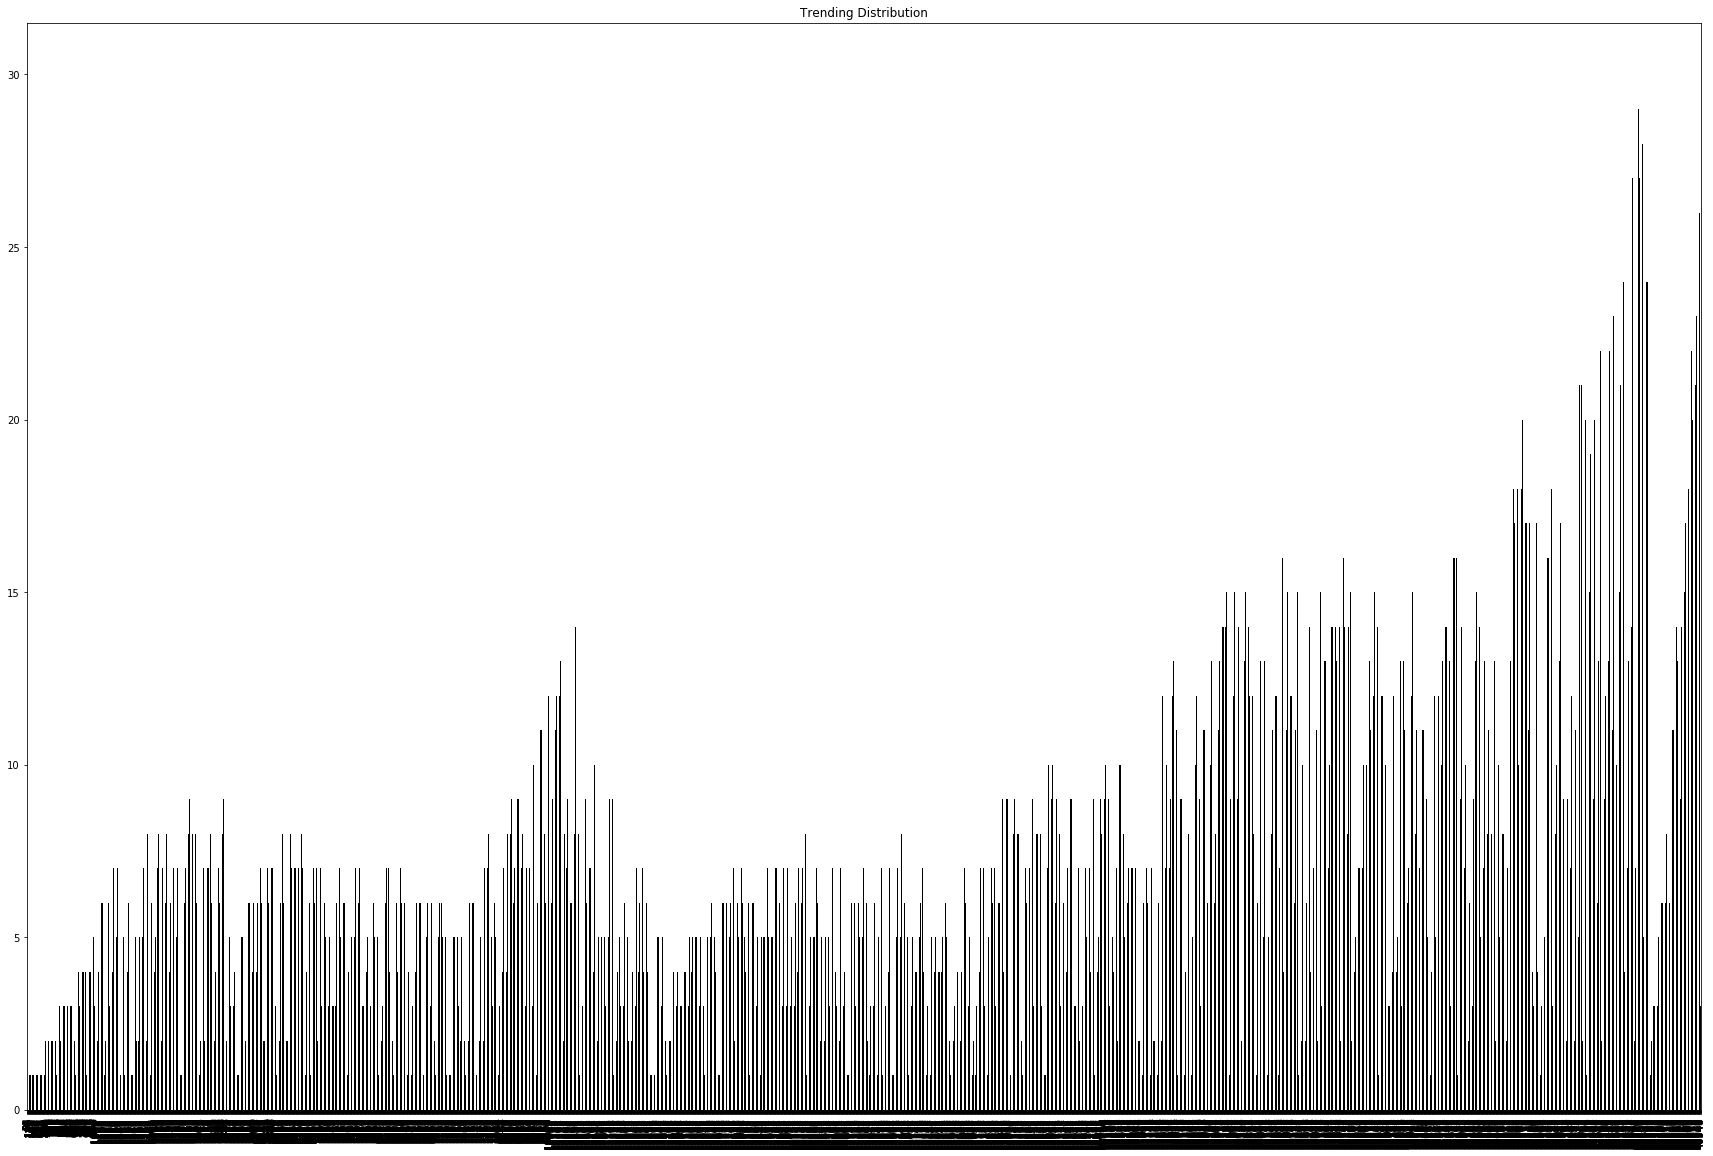

In [138]:
country['trending_days'].plot(kind='bar', x='title', color='black', y='count', title='Trending Distribution', figsize=(30,20))

In [110]:
country['polarity'] = country['description'].map(lambda text: TextBlob(text).sentiment.polarity)

In [111]:
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,category,likes/views,views/trending_days,polarity,desc_len
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,People & Blogs,7.686932,1.069106e+07,-0.166667,1410
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,"One year after the presidential election, John...",7,Entertainment,4.017930,3.455404e+07,0.079167,630
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,Comedy,4.575780,4.559191e+07,0.145833,1177
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,False,Today we find out if Link is a Nickelback amat...,7,Entertainment,2.964146,4.902400e+06,-0.017330,1403
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,False,I know it's been a while since we did this sho...,6,Entertainment,6.309732,3.492885e+07,0.459091,636


In [105]:
country['desc_len'] = country['description'].astype(str).apply(len)

In [113]:
print('5 descriptions with the highest positive sentiment polarity: \n')
cl = country.loc[country.polarity == 1, ['description']].sample(5).values
for c in cl:
    print(c[0])

5 descriptions with the highest positive sentiment polarity: 

Jun Liu teaches choreography to This is me by The Greatest Showman OST. \n\n\n1MILLION Dance Studio\n\nYouTube Channel: \nhttps://www.youtube.com/1milliondancestudioasia\n\nOFFICIAL WEBSITE:\nhttp://www.1milliondance.com\n\nINSTAGRAM:\nhttps://instagram.com/1milliondance\n\nFACEBOOK:\nhttps://www.facebook.com/1milliondancestudio\n\n\n1MILLION Dance Studio
Jun Liu teaches choreography to This is me by The Greatest Showman OST. \n\n\n1MILLION Dance Studio\n\nYouTube Channel: \nhttps://www.youtube.com/1milliondancestudioasia\n\nOFFICIAL WEBSITE:\nhttp://www.1milliondance.com\n\nINSTAGRAM:\nhttps://instagram.com/1milliondance\n\nFACEBOOK:\nhttps://www.facebook.com/1milliondancestudio\n\n\n1MILLION Dance Studio
Happy President's Day! What do you guys think?\nAlso, are you registered to vote? https://vote.gov/\n\nKITCHEN SWAGGAH: http://dftba.com/hannah\n\nThis is a truly wonderful time. These moments are treasures!\n\nWant to he

In [114]:
print('5 descriptions with the most neutral sentiment(zero) polarity: \n')
cl = country.loc[country.polarity == 0, ['description']].sample(5).values
for c in cl:
    print(c[0])

5 descriptions with the most neutral sentiment(zero) polarity: 

All 71 people aboard a Saratov Airlines plane died when the plane crashed southeast of Moscow on Sunday, Russian state news agency Tass reported.
Lucas is a tiny spider to some...giant arachnid to others.
Christmas Tree with Trolls, Moana, and Christmas Songs.    Done with a projector, Sandevices e682, WS2811 pixels and Raspberry Pi running Falcon Pi Player.\n\nInstructable at: https://www.instructables.com/id/LED-Christmas-Tree-With-Video-Projector-Rasp-Pi/
÷. Out Now: https://atlanti.cr/yt-albumSubscribe to Ed's channel: http://bit.ly/SubscribeToEdSheeranFollow Ed on...Facebook: http://www.facebook.com/EdSheeranMusicTwitter: http://twitter.com/edsheeranInstagram: http://instagram.com/teddysphotosOfficial Website: http://edsheeran.com
ET spoke the actress about the mix-up at the 'All the Money in the World' press day on Sunday. The crime thriller hits theaters Dec. 25.


In [133]:
# country = country.drop_duplicates(subset='video_id', keep='last')
# country.head()

In [119]:
print('5 titles with the highest positive sentiment polarity: \n')
cl = country.loc[country.polarity == 1, ['title']].head(5).values
for c in cl:
    print(c[0])

5 titles with the highest positive sentiment polarity: 

Apple iPhone X Review: The Best Yet!
'Lightning Strike' B777-300 on departure @ KL743 // PH-BVS
Anna Camp Takes the Bra Off Her Back for Anna Kendrick
How to Take Out AT-ATs - EASY METHOD EXPLAINED!!
Rebel Wilson's does her Pitch Perfect audition - The Graham Norton Show: 2017 - BBC One


In [124]:
print('5 titles with the highest negative sentiment polarity: \n')
cl = country.loc[country.polarity == -1, ['title']].head(5).values
for c in cl:
    print(c[0])

5 titles with the highest negative sentiment polarity: 

Dallas Mavericks caoch Rick Carlisle sounds off on ESPN Lavar Ball article
TURNING A CAR INTO A COMPUTER MOUSE


In [125]:
print('5 titles with neutral sentiment polarity: \n')
cl = country.loc[country.polarity == 0, ['title']].head(5).values
for c in cl:
    print(c[0])

5 titles with neutral sentiment polarity: 

Sigrid - Strangers (Lyric Video)
Where is TOKYO'S GREATEST View?
The Oak Beams of New College, Oxford
Huffy Metaloid Bicycle Commercial 1997
A Tropical Island with 500 CATS!


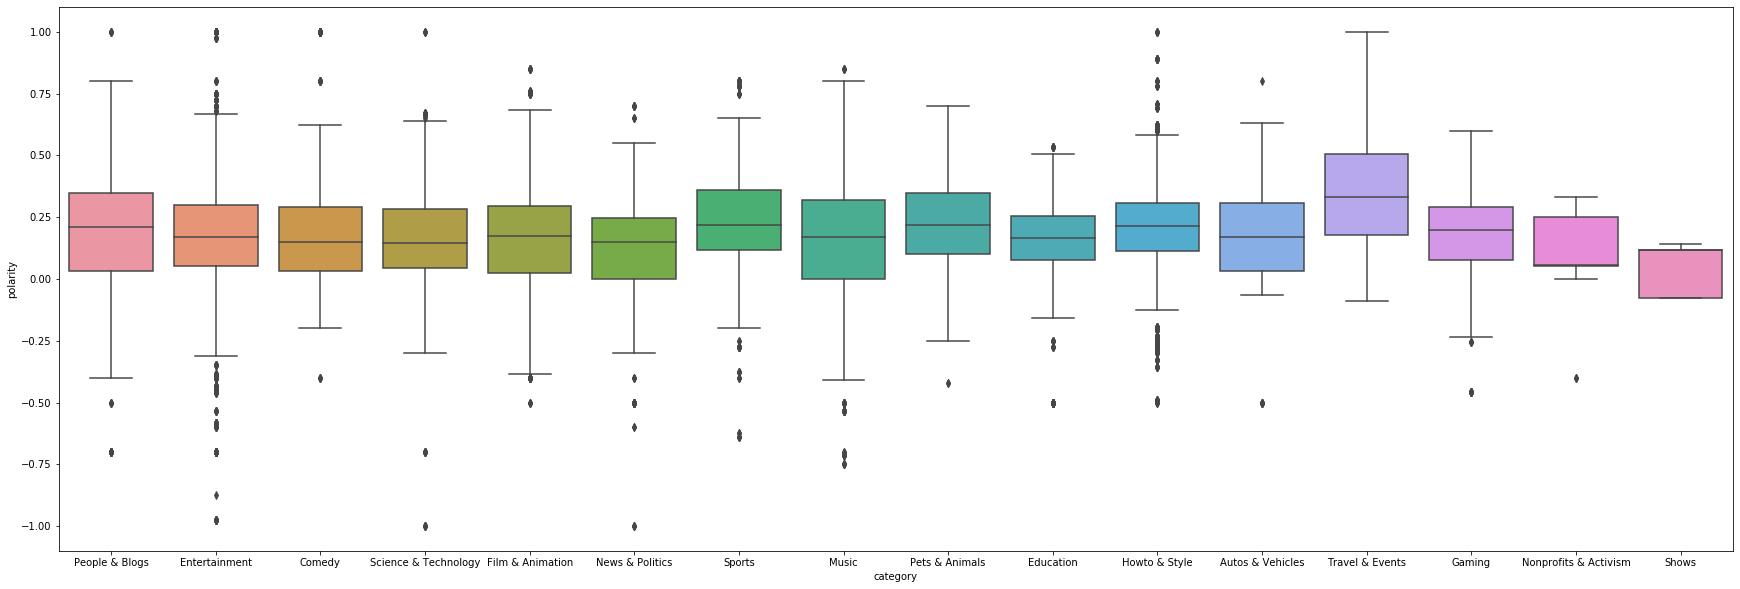

In [92]:
plt.figure(figsize=(30,10))
sns.boxplot(x='category', y='polarity', data=country)

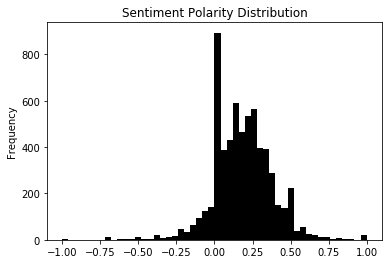

In [129]:
country['polarity'].plot(
    kind='hist',
    bins=50,
    x='polarity',
    color='black',
    y='count',
    title='Sentiment Polarity Distribution')

TypeError: no numeric data to plot

In [95]:
!pip install plotly==4.4.1
!pip install "notebook>=5.3" "ipywidgets>=7.2"

In [99]:
import plotly.graph_objects as go
# from plotly.plotly import iplot

!pip install chart-studio==1.0.0

     |████████████████████████████████| 81kB 4.7MB/s eta 0:00:011


In [ ]:
# checking the distribution of word length in description

country['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')